# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 18 vs Chr 18p11

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 2

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_18': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-4L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-5L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\ch

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_18']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-8L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-11L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-13L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-16L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-25L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-7L.bmp',
 '

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_18': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_18', 'chr_18_p11_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  2
chr_18
   Train: 
        181228-i(18)(q10)+18-11L.bmp
        181228-i(18)(q10)+18-13L.bmp
        181228-i(18)(q10)+18-14L.bmp
        181228-i(18)(q10)+18-1L.bmp
        181228-i(18)(q10)+18-3L.bmp
        181228-i(18)(q10)+18-4L.bmp
        181228-i(18)(q10)+18-5L.bmp
        181228-i(18)(q10)+18-8L.bmp
        181228-i(18)(q10)+18-9L.bmp
        183873-del(18)(p11)-10L.bmp
        183873-del(18)(p11)-11L.bmp
        183873-del(18)(p11)-12L.bmp
        183873-del(18)(p11)-13L.bmp
        183873-del(18)(p11)-14L.bmp
        183873-del(18)(p11)-15L.bmp
        183873-del(18)(p11)-16L.bmp
        183873-del(18)(p11)-17L.bmp
        183873-del(18)(p11)-19L.bmp
        183873-del(18)(p11)-1L.bmp
        183873-del(18)(p11)-20L.bmp
        183873-del(18)(p11)-21L.bmp
        183873-del(18)(p11)-22L.bmp
        183873-del(18)(p11)-23L.bmp
        183873-del(18)(p11)-24L.bmp
        183873-del(18)(p11)-25L.bmp
        183873-del(18)(p11)-2L.bmp
        183873-del(18)(p11)-

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

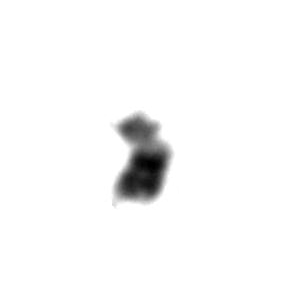

In [12]:
image['chr_18'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_18': 0, 
               'chr_18_p11_deletion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_18',
                1: 'chr_18_p11_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

201

In [25]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [26]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [29]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [30]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=2000, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/2000
4/4 [==============================] - 5s 618ms/step - loss: 1660.7512 - accuracy: 0.5572 - val_loss: 238.2891 - val_accuracy: 0.3000
Epoch 2/2000
4/4 [==============================] - 1s 307ms/step - loss: 95.7464 - accuracy: 0.5871 - val_loss: 46.8831 - val_accuracy: 0.3000
Epoch 3/2000
4/4 [==============================] - 1s 109ms/step - loss: 26.6494 - accuracy: 0.5771 - val_loss: 0.8578 - val_accuracy: 0.3000
Epoch 4/2000
4/4 [==============================] - 1s 116ms/step - loss: 0.9318 - accuracy: 0.5572 - val_loss: 0.6819 - val_accuracy: 0.7000
Epoch 5/2000
4/4 [==============================] - 1s 107ms/step - loss: 0.6704 - accuracy: 0.7015 - val_loss: 0.6394 - val_accuracy: 0.7000
Epoch 6/2000
4/4 [==============================] - 1s 111ms/step - loss: 0.4990 - accuracy: 0.7065 - val_loss: 41.7534 - val_accuracy: 0.7000
Epoch 7/2000
4/4 [==============================] - 1s 106ms/step - loss: 15.8204 - accuracy: 0.7463 - val_loss: 0.8405 - val_accuracy: 0.7

4/4 [==============================] - 1s 99ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 1.8529 - val_accuracy: 0.6600
Epoch 59/2000
4/4 [==============================] - 1s 115ms/step - loss: 0.0194 - accuracy: 0.9950 - val_loss: 2.0979 - val_accuracy: 0.6800
Epoch 60/2000
4/4 [==============================] - 0s 113ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.9977 - val_accuracy: 0.6800
Epoch 61/2000
4/4 [==============================] - 1s 107ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7928 - val_accuracy: 0.7400
Epoch 62/2000
4/4 [==============================] - 1s 104ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7611 - val_accuracy: 0.7400
Epoch 63/2000
4/4 [==============================] - 1s 109ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.6794 - val_accuracy: 0.7600
Epoch 64/2000
4/4 [==============================] - 1s 108ms/step - loss: 0.0082 - accuracy: 0.9950 - val_loss: 1.7350 - val_accuracy: 0.7400
Epoch 65/2000


4/4 [==============================] - 1s 106ms/step - loss: 1.5229e-05 - accuracy: 1.0000 - val_loss: 1.8734 - val_accuracy: 0.7600
Epoch 115/2000
4/4 [==============================] - 1s 111ms/step - loss: 1.4860e-05 - accuracy: 1.0000 - val_loss: 1.8738 - val_accuracy: 0.7600
Epoch 116/2000
4/4 [==============================] - 1s 114ms/step - loss: 1.4479e-05 - accuracy: 1.0000 - val_loss: 1.8752 - val_accuracy: 0.7600
Epoch 117/2000
4/4 [==============================] - 1s 111ms/step - loss: 1.4063e-05 - accuracy: 1.0000 - val_loss: 1.8777 - val_accuracy: 0.7600
Epoch 118/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.3678e-05 - accuracy: 1.0000 - val_loss: 1.8789 - val_accuracy: 0.7600
Epoch 119/2000
4/4 [==============================] - 1s 248ms/step - loss: 1.3340e-05 - accuracy: 1.0000 - val_loss: 1.8792 - val_accuracy: 0.7600
Epoch 120/2000
4/4 [==============================] - 1s 108ms/step - loss: 1.3002e-05 - accuracy: 1.0000 - val_loss: 1.8791 - 

4/4 [==============================] - 1s 122ms/step - loss: 5.6938e-06 - accuracy: 1.0000 - val_loss: 1.8793 - val_accuracy: 0.8000
Epoch 170/2000
4/4 [==============================] - 1s 117ms/step - loss: 5.6227e-06 - accuracy: 1.0000 - val_loss: 1.8792 - val_accuracy: 0.8000
Epoch 171/2000
4/4 [==============================] - 1s 116ms/step - loss: 5.5503e-06 - accuracy: 1.0000 - val_loss: 1.8786 - val_accuracy: 0.8000
Epoch 172/2000
4/4 [==============================] - 1s 105ms/step - loss: 5.4703e-06 - accuracy: 1.0000 - val_loss: 1.8782 - val_accuracy: 0.8000
Epoch 173/2000
4/4 [==============================] - 1s 110ms/step - loss: 5.4021e-06 - accuracy: 1.0000 - val_loss: 1.8780 - val_accuracy: 0.8000
Epoch 174/2000
4/4 [==============================] - 1s 106ms/step - loss: 5.3238e-06 - accuracy: 1.0000 - val_loss: 1.8774 - val_accuracy: 0.8000
Epoch 175/2000
4/4 [==============================] - 1s 109ms/step - loss: 5.2544e-06 - accuracy: 1.0000 - val_loss: 1.8771 - 

4/4 [==============================] - 1s 112ms/step - loss: 2.8509e-06 - accuracy: 1.0000 - val_loss: 1.8792 - val_accuracy: 0.8000
Epoch 225/2000
4/4 [==============================] - 1s 111ms/step - loss: 2.8028e-06 - accuracy: 1.0000 - val_loss: 1.8791 - val_accuracy: 0.8000
Epoch 226/2000
4/4 [==============================] - 1s 111ms/step - loss: 2.7613e-06 - accuracy: 1.0000 - val_loss: 1.8785 - val_accuracy: 0.8000
Epoch 227/2000
4/4 [==============================] - 1s 125ms/step - loss: 2.7186e-06 - accuracy: 1.0000 - val_loss: 1.8779 - val_accuracy: 0.8000
Epoch 228/2000
4/4 [==============================] - 1s 109ms/step - loss: 2.6824e-06 - accuracy: 1.0000 - val_loss: 1.8775 - val_accuracy: 0.8000
Epoch 229/2000
4/4 [==============================] - 1s 121ms/step - loss: 2.6498e-06 - accuracy: 1.0000 - val_loss: 1.8773 - val_accuracy: 0.8000
Epoch 230/2000
4/4 [==============================] - 1s 127ms/step - loss: 2.6166e-06 - accuracy: 1.0000 - val_loss: 1.8768 - 

4/4 [==============================] - 1s 103ms/step - loss: 1.6149e-06 - accuracy: 1.0000 - val_loss: 1.8455 - val_accuracy: 0.8000
Epoch 280/2000
4/4 [==============================] - 1s 107ms/step - loss: 1.6031e-06 - accuracy: 1.0000 - val_loss: 1.8446 - val_accuracy: 0.8000
Epoch 281/2000
4/4 [==============================] - 1s 107ms/step - loss: 1.5871e-06 - accuracy: 1.0000 - val_loss: 1.8438 - val_accuracy: 0.8000
Epoch 282/2000
4/4 [==============================] - 1s 108ms/step - loss: 1.5740e-06 - accuracy: 1.0000 - val_loss: 1.8430 - val_accuracy: 0.8000
Epoch 283/2000
4/4 [==============================] - 1s 113ms/step - loss: 1.5568e-06 - accuracy: 1.0000 - val_loss: 1.8424 - val_accuracy: 0.8000
Epoch 284/2000
4/4 [==============================] - 1s 104ms/step - loss: 1.5361e-06 - accuracy: 1.0000 - val_loss: 1.8419 - val_accuracy: 0.8000
Epoch 285/2000
4/4 [==============================] - 1s 119ms/step - loss: 1.5194e-06 - accuracy: 1.0000 - val_loss: 1.8409 - 

4/4 [==============================] - 1s 106ms/step - loss: 9.1868e-07 - accuracy: 1.0000 - val_loss: 1.8064 - val_accuracy: 0.8000
Epoch 335/2000
4/4 [==============================] - 1s 107ms/step - loss: 9.1215e-07 - accuracy: 1.0000 - val_loss: 1.8050 - val_accuracy: 0.8000
Epoch 336/2000
4/4 [==============================] - 1s 116ms/step - loss: 9.0622e-07 - accuracy: 1.0000 - val_loss: 1.8035 - val_accuracy: 0.8000
Epoch 337/2000
4/4 [==============================] - 1s 128ms/step - loss: 8.9614e-07 - accuracy: 1.0000 - val_loss: 1.8021 - val_accuracy: 0.8000
Epoch 338/2000
4/4 [==============================] - 1s 110ms/step - loss: 8.8784e-07 - accuracy: 1.0000 - val_loss: 1.8008 - val_accuracy: 0.8000
Epoch 339/2000
4/4 [==============================] - 1s 102ms/step - loss: 8.7835e-07 - accuracy: 1.0000 - val_loss: 1.7999 - val_accuracy: 0.8000
Epoch 340/2000
4/4 [==============================] - 1s 125ms/step - loss: 8.7182e-07 - accuracy: 1.0000 - val_loss: 1.7991 - 

4/4 [==============================] - 1s 109ms/step - loss: 6.0613e-07 - accuracy: 1.0000 - val_loss: 1.7574 - val_accuracy: 0.8000
Epoch 390/2000
4/4 [==============================] - 1s 110ms/step - loss: 6.0197e-07 - accuracy: 1.0000 - val_loss: 1.7567 - val_accuracy: 0.8000
Epoch 391/2000
4/4 [==============================] - 1s 115ms/step - loss: 5.9842e-07 - accuracy: 1.0000 - val_loss: 1.7563 - val_accuracy: 0.8000
Epoch 392/2000
4/4 [==============================] - 1s 109ms/step - loss: 5.9604e-07 - accuracy: 1.0000 - val_loss: 1.7559 - val_accuracy: 0.8000
Epoch 393/2000
4/4 [==============================] - 1s 108ms/step - loss: 5.9071e-07 - accuracy: 1.0000 - val_loss: 1.7552 - val_accuracy: 0.8000
Epoch 394/2000
4/4 [==============================] - 1s 125ms/step - loss: 5.8596e-07 - accuracy: 1.0000 - val_loss: 1.7546 - val_accuracy: 0.8000
Epoch 395/2000
4/4 [==============================] - 1s 104ms/step - loss: 5.8062e-07 - accuracy: 1.0000 - val_loss: 1.7539 - 

4/4 [==============================] - 1s 111ms/step - loss: 4.2227e-07 - accuracy: 1.0000 - val_loss: 1.7197 - val_accuracy: 0.8000
Epoch 445/2000
4/4 [==============================] - 1s 114ms/step - loss: 4.1990e-07 - accuracy: 1.0000 - val_loss: 1.7189 - val_accuracy: 0.8000
Epoch 446/2000
4/4 [==============================] - 1s 113ms/step - loss: 4.1575e-07 - accuracy: 1.0000 - val_loss: 1.7182 - val_accuracy: 0.8000
Epoch 447/2000
4/4 [==============================] - 1s 108ms/step - loss: 4.1456e-07 - accuracy: 1.0000 - val_loss: 1.7175 - val_accuracy: 0.8000
Epoch 448/2000
4/4 [==============================] - 1s 123ms/step - loss: 4.1219e-07 - accuracy: 1.0000 - val_loss: 1.7168 - val_accuracy: 0.8000
Epoch 449/2000
4/4 [==============================] - 1s 102ms/step - loss: 4.0982e-07 - accuracy: 1.0000 - val_loss: 1.7161 - val_accuracy: 0.8000
Epoch 450/2000
4/4 [==============================] - 1s 127ms/step - loss: 4.0626e-07 - accuracy: 1.0000 - val_loss: 1.7153 - 

4/4 [==============================] - 1s 110ms/step - loss: 3.1315e-07 - accuracy: 1.0000 - val_loss: 1.6846 - val_accuracy: 0.8000
Epoch 500/2000
4/4 [==============================] - 1s 102ms/step - loss: 3.0959e-07 - accuracy: 1.0000 - val_loss: 1.6840 - val_accuracy: 0.8000
Epoch 501/2000
4/4 [==============================] - 1s 103ms/step - loss: 3.0899e-07 - accuracy: 1.0000 - val_loss: 1.6833 - val_accuracy: 0.8000
Epoch 502/2000
4/4 [==============================] - 1s 105ms/step - loss: 3.0781e-07 - accuracy: 1.0000 - val_loss: 1.6826 - val_accuracy: 0.8000
Epoch 503/2000
4/4 [==============================] - 1s 112ms/step - loss: 3.0603e-07 - accuracy: 1.0000 - val_loss: 1.6820 - val_accuracy: 0.8000
Epoch 504/2000
4/4 [==============================] - 1s 99ms/step - loss: 3.0544e-07 - accuracy: 1.0000 - val_loss: 1.6815 - val_accuracy: 0.8000
Epoch 505/2000
4/4 [==============================] - 1s 106ms/step - loss: 3.0484e-07 - accuracy: 1.0000 - val_loss: 1.6810 - v

4/4 [==============================] - 1s 111ms/step - loss: 2.4138e-07 - accuracy: 1.0000 - val_loss: 1.6495 - val_accuracy: 0.8000
Epoch 555/2000
4/4 [==============================] - 1s 110ms/step - loss: 2.4138e-07 - accuracy: 1.0000 - val_loss: 1.6487 - val_accuracy: 0.8000
Epoch 556/2000
4/4 [==============================] - 1s 108ms/step - loss: 2.4079e-07 - accuracy: 1.0000 - val_loss: 1.6480 - val_accuracy: 0.8000
Epoch 557/2000
4/4 [==============================] - 1s 113ms/step - loss: 2.4020e-07 - accuracy: 1.0000 - val_loss: 1.6474 - val_accuracy: 0.8000
Epoch 558/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 1.6467 - val_accuracy: 0.8000
Epoch 559/2000
4/4 [==============================] - 1s 119ms/step - loss: 2.3783e-07 - accuracy: 1.0000 - val_loss: 1.6460 - val_accuracy: 0.8000
Epoch 560/2000
4/4 [==============================] - 1s 111ms/step - loss: 2.3723e-07 - accuracy: 1.0000 - val_loss: 1.6452 - 

4/4 [==============================] - 1s 236ms/step - loss: 1.9216e-07 - accuracy: 1.0000 - val_loss: 1.6161 - val_accuracy: 0.8000
Epoch 610/2000
4/4 [==============================] - 1s 109ms/step - loss: 1.9156e-07 - accuracy: 1.0000 - val_loss: 1.6155 - val_accuracy: 0.8000
Epoch 611/2000
4/4 [==============================] - 1s 114ms/step - loss: 1.9038e-07 - accuracy: 1.0000 - val_loss: 1.6149 - val_accuracy: 0.8000
Epoch 612/2000
4/4 [==============================] - 1s 108ms/step - loss: 1.8979e-07 - accuracy: 1.0000 - val_loss: 1.6143 - val_accuracy: 0.8000
Epoch 613/2000
4/4 [==============================] - 1s 111ms/step - loss: 1.8860e-07 - accuracy: 1.0000 - val_loss: 1.6138 - val_accuracy: 0.8000
Epoch 614/2000
4/4 [==============================] - 1s 122ms/step - loss: 1.8860e-07 - accuracy: 1.0000 - val_loss: 1.6134 - val_accuracy: 0.8000
Epoch 615/2000
4/4 [==============================] - 1s 109ms/step - loss: 1.8801e-07 - accuracy: 1.0000 - val_loss: 1.6129 - 

4/4 [==============================] - 1s 110ms/step - loss: 1.5361e-07 - accuracy: 1.0000 - val_loss: 1.5878 - val_accuracy: 0.8000
Epoch 665/2000
4/4 [==============================] - 1s 119ms/step - loss: 1.5242e-07 - accuracy: 1.0000 - val_loss: 1.5872 - val_accuracy: 0.8000
Epoch 666/2000
4/4 [==============================] - 1s 117ms/step - loss: 1.5183e-07 - accuracy: 1.0000 - val_loss: 1.5869 - val_accuracy: 0.8000
Epoch 667/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.5183e-07 - accuracy: 1.0000 - val_loss: 1.5866 - val_accuracy: 0.8000
Epoch 668/2000
4/4 [==============================] - 1s 117ms/step - loss: 1.5064e-07 - accuracy: 1.0000 - val_loss: 1.5863 - val_accuracy: 0.8000
Epoch 669/2000
4/4 [==============================] - 2s 531ms/step - loss: 1.5005e-07 - accuracy: 1.0000 - val_loss: 1.5859 - val_accuracy: 0.8000
Epoch 670/2000
4/4 [==============================] - 1s 101ms/step - loss: 1.4886e-07 - accuracy: 1.0000 - val_loss: 1.5856 - 

4/4 [==============================] - 1s 107ms/step - loss: 1.2692e-07 - accuracy: 1.0000 - val_loss: 1.5618 - val_accuracy: 0.8000
Epoch 720/2000
4/4 [==============================] - 1s 110ms/step - loss: 1.2692e-07 - accuracy: 1.0000 - val_loss: 1.5614 - val_accuracy: 0.8000
Epoch 721/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.2692e-07 - accuracy: 1.0000 - val_loss: 1.5610 - val_accuracy: 0.8000
Epoch 722/2000
4/4 [==============================] - 1s 109ms/step - loss: 1.2573e-07 - accuracy: 1.0000 - val_loss: 1.5607 - val_accuracy: 0.8000
Epoch 723/2000
4/4 [==============================] - 1s 108ms/step - loss: 1.2573e-07 - accuracy: 1.0000 - val_loss: 1.5603 - val_accuracy: 0.8000
Epoch 724/2000
4/4 [==============================] - 1s 117ms/step - loss: 1.2455e-07 - accuracy: 1.0000 - val_loss: 1.5599 - val_accuracy: 0.8000
Epoch 725/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.2395e-07 - accuracy: 1.0000 - val_loss: 1.5595 - 

4/4 [==============================] - 1s 110ms/step - loss: 1.0498e-07 - accuracy: 1.0000 - val_loss: 1.5408 - val_accuracy: 0.8000
Epoch 775/2000
4/4 [==============================] - 1s 104ms/step - loss: 1.0379e-07 - accuracy: 1.0000 - val_loss: 1.5406 - val_accuracy: 0.8000
Epoch 776/2000
4/4 [==============================] - 1s 110ms/step - loss: 1.0379e-07 - accuracy: 1.0000 - val_loss: 1.5403 - val_accuracy: 0.8000
Epoch 777/2000
4/4 [==============================] - 1s 111ms/step - loss: 1.0379e-07 - accuracy: 1.0000 - val_loss: 1.5400 - val_accuracy: 0.8000
Epoch 778/2000
4/4 [==============================] - 1s 110ms/step - loss: 1.0379e-07 - accuracy: 1.0000 - val_loss: 1.5396 - val_accuracy: 0.8000
Epoch 779/2000
4/4 [==============================] - 1s 106ms/step - loss: 1.0379e-07 - accuracy: 1.0000 - val_loss: 1.5393 - val_accuracy: 0.8000
Epoch 780/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.0320e-07 - accuracy: 1.0000 - val_loss: 1.5390 - 

4/4 [==============================] - 1s 109ms/step - loss: 8.7776e-08 - accuracy: 1.0000 - val_loss: 1.5249 - val_accuracy: 0.8000
Epoch 830/2000
4/4 [==============================] - 1s 107ms/step - loss: 8.7776e-08 - accuracy: 1.0000 - val_loss: 1.5246 - val_accuracy: 0.8000
Epoch 831/2000
4/4 [==============================] - 1s 109ms/step - loss: 8.7776e-08 - accuracy: 1.0000 - val_loss: 1.5243 - val_accuracy: 0.8000
Epoch 832/2000
4/4 [==============================] - 1s 108ms/step - loss: 8.7776e-08 - accuracy: 1.0000 - val_loss: 1.5240 - val_accuracy: 0.8000
Epoch 833/2000
4/4 [==============================] - 1s 127ms/step - loss: 8.7776e-08 - accuracy: 1.0000 - val_loss: 1.5240 - val_accuracy: 0.8000
Epoch 834/2000
4/4 [==============================] - 1s 109ms/step - loss: 8.5997e-08 - accuracy: 1.0000 - val_loss: 1.5237 - val_accuracy: 0.8000
Epoch 835/2000
4/4 [==============================] - 1s 108ms/step - loss: 8.4811e-08 - accuracy: 1.0000 - val_loss: 1.5234 - 

4/4 [==============================] - 1s 118ms/step - loss: 7.4135e-08 - accuracy: 1.0000 - val_loss: 1.5077 - val_accuracy: 0.8000
Epoch 885/2000
4/4 [==============================] - 1s 105ms/step - loss: 7.4135e-08 - accuracy: 1.0000 - val_loss: 1.5074 - val_accuracy: 0.8000
Epoch 886/2000
4/4 [==============================] - 1s 114ms/step - loss: 7.4135e-08 - accuracy: 1.0000 - val_loss: 1.5071 - val_accuracy: 0.8000
Epoch 887/2000
4/4 [==============================] - 1s 117ms/step - loss: 7.4135e-08 - accuracy: 1.0000 - val_loss: 1.5068 - val_accuracy: 0.8000
Epoch 888/2000
4/4 [==============================] - 1s 111ms/step - loss: 7.2949e-08 - accuracy: 1.0000 - val_loss: 1.5066 - val_accuracy: 0.8000
Epoch 889/2000
4/4 [==============================] - 1s 124ms/step - loss: 7.1763e-08 - accuracy: 1.0000 - val_loss: 1.5061 - val_accuracy: 0.8000
Epoch 890/2000
4/4 [==============================] - 1s 113ms/step - loss: 7.1763e-08 - accuracy: 1.0000 - val_loss: 1.5056 - 

4/4 [==============================] - 1s 124ms/step - loss: 6.0494e-08 - accuracy: 1.0000 - val_loss: 1.4916 - val_accuracy: 0.8000
Epoch 940/2000
4/4 [==============================] - 1s 110ms/step - loss: 6.0494e-08 - accuracy: 1.0000 - val_loss: 1.4915 - val_accuracy: 0.8000
Epoch 941/2000
4/4 [==============================] - 1s 108ms/step - loss: 5.9901e-08 - accuracy: 1.0000 - val_loss: 1.4913 - val_accuracy: 0.8000
Epoch 942/2000
4/4 [==============================] - 1s 126ms/step - loss: 5.9901e-08 - accuracy: 1.0000 - val_loss: 1.4911 - val_accuracy: 0.8000
Epoch 943/2000
4/4 [==============================] - 1s 115ms/step - loss: 5.9901e-08 - accuracy: 1.0000 - val_loss: 1.4909 - val_accuracy: 0.8000
Epoch 944/2000
4/4 [==============================] - 1s 107ms/step - loss: 5.9901e-08 - accuracy: 1.0000 - val_loss: 1.4907 - val_accuracy: 0.8000
Epoch 945/2000
4/4 [==============================] - 1s 128ms/step - loss: 5.9901e-08 - accuracy: 1.0000 - val_loss: 1.4904 - 

4/4 [==============================] - 1s 112ms/step - loss: 5.1005e-08 - accuracy: 1.0000 - val_loss: 1.4776 - val_accuracy: 0.8000
Epoch 995/2000
4/4 [==============================] - 1s 130ms/step - loss: 5.1005e-08 - accuracy: 1.0000 - val_loss: 1.4773 - val_accuracy: 0.8000
Epoch 996/2000
4/4 [==============================] - 1s 101ms/step - loss: 5.1005e-08 - accuracy: 1.0000 - val_loss: 1.4768 - val_accuracy: 0.8000
Epoch 997/2000
4/4 [==============================] - 1s 107ms/step - loss: 5.1005e-08 - accuracy: 1.0000 - val_loss: 1.4765 - val_accuracy: 0.8000
Epoch 998/2000
4/4 [==============================] - 1s 106ms/step - loss: 5.0412e-08 - accuracy: 1.0000 - val_loss: 1.4761 - val_accuracy: 0.8000
Epoch 999/2000
4/4 [==============================] - 1s 123ms/step - loss: 4.9819e-08 - accuracy: 1.0000 - val_loss: 1.4759 - val_accuracy: 0.8000
Epoch 1000/2000
4/4 [==============================] - 1s 109ms/step - loss: 4.9819e-08 - accuracy: 1.0000 - val_loss: 1.4757 -

4/4 [==============================] - 1s 105ms/step - loss: 4.4481e-08 - accuracy: 1.0000 - val_loss: 1.4633 - val_accuracy: 0.8000
Epoch 1050/2000
4/4 [==============================] - 1s 105ms/step - loss: 4.4481e-08 - accuracy: 1.0000 - val_loss: 1.4631 - val_accuracy: 0.8000
Epoch 1051/2000
4/4 [==============================] - 1s 108ms/step - loss: 4.4481e-08 - accuracy: 1.0000 - val_loss: 1.4629 - val_accuracy: 0.8000
Epoch 1052/2000
4/4 [==============================] - 1s 110ms/step - loss: 4.4481e-08 - accuracy: 1.0000 - val_loss: 1.4627 - val_accuracy: 0.8000
Epoch 1053/2000
4/4 [==============================] - 1s 123ms/step - loss: 4.4481e-08 - accuracy: 1.0000 - val_loss: 1.4625 - val_accuracy: 0.8000
Epoch 1054/2000
4/4 [==============================] - 1s 121ms/step - loss: 4.3888e-08 - accuracy: 1.0000 - val_loss: 1.4623 - val_accuracy: 0.8000
Epoch 1055/2000
4/4 [==============================] - 1s 210ms/step - loss: 4.3888e-08 - accuracy: 1.0000 - val_loss: 1.4

4/4 [==============================] - 1s 111ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4487 - val_accuracy: 0.8000
Epoch 1105/2000
4/4 [==============================] - 1s 112ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4484 - val_accuracy: 0.8000
Epoch 1106/2000
4/4 [==============================] - 1s 113ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4481 - val_accuracy: 0.8000
Epoch 1107/2000
4/4 [==============================] - 1s 111ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4478 - val_accuracy: 0.8000
Epoch 1108/2000
4/4 [==============================] - 1s 115ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4476 - val_accuracy: 0.8000
Epoch 1109/2000
4/4 [==============================] - 1s 112ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4473 - val_accuracy: 0.8000
Epoch 1110/2000
4/4 [==============================] - 1s 123ms/step - loss: 3.7957e-08 - accuracy: 1.0000 - val_loss: 1.4

4/4 [==============================] - 1s 111ms/step - loss: 3.2026e-08 - accuracy: 1.0000 - val_loss: 1.4391 - val_accuracy: 0.8000
Epoch 1160/2000
4/4 [==============================] - 1s 113ms/step - loss: 3.2026e-08 - accuracy: 1.0000 - val_loss: 1.4389 - val_accuracy: 0.8000
Epoch 1161/2000
4/4 [==============================] - 1s 116ms/step - loss: 3.2026e-08 - accuracy: 1.0000 - val_loss: 1.4387 - val_accuracy: 0.8000
Epoch 1162/2000
4/4 [==============================] - 1s 112ms/step - loss: 3.2026e-08 - accuracy: 1.0000 - val_loss: 1.4385 - val_accuracy: 0.8000
Epoch 1163/2000
4/4 [==============================] - 1s 130ms/step - loss: 3.2026e-08 - accuracy: 1.0000 - val_loss: 1.4384 - val_accuracy: 0.8000
Epoch 1164/2000
4/4 [==============================] - 1s 108ms/step - loss: 3.1433e-08 - accuracy: 1.0000 - val_loss: 1.4383 - val_accuracy: 0.8000
Epoch 1165/2000
4/4 [==============================] - 1s 108ms/step - loss: 3.1433e-08 - accuracy: 1.0000 - val_loss: 1.4

4/4 [==============================] - 1s 107ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4304 - val_accuracy: 0.8000
Epoch 1215/2000
4/4 [==============================] - 1s 108ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4303 - val_accuracy: 0.8000
Epoch 1216/2000
4/4 [==============================] - 1s 122ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4302 - val_accuracy: 0.8000
Epoch 1217/2000
4/4 [==============================] - 1s 115ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4300 - val_accuracy: 0.8000
Epoch 1218/2000
4/4 [==============================] - 1s 130ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4297 - val_accuracy: 0.8000
Epoch 1219/2000
4/4 [==============================] - 1s 109ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4294 - val_accuracy: 0.8000
Epoch 1220/2000
4/4 [==============================] - 1s 108ms/step - loss: 2.7875e-08 - accuracy: 1.0000 - val_loss: 1.4

4/4 [==============================] - 1s 116ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4187 - val_accuracy: 0.8000
Epoch 1270/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4185 - val_accuracy: 0.8000
Epoch 1271/2000
4/4 [==============================] - 1s 136ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4184 - val_accuracy: 0.8000
Epoch 1272/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4183 - val_accuracy: 0.8000
Epoch 1273/2000
4/4 [==============================] - 1s 110ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4181 - val_accuracy: 0.8000
Epoch 1274/2000
4/4 [==============================] - 1s 108ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4178 - val_accuracy: 0.8000
Epoch 1275/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.4316e-08 - accuracy: 1.0000 - val_loss: 1.4

4/4 [==============================] - 1s 107ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.4083 - val_accuracy: 0.8200
Epoch 1325/2000
4/4 [==============================] - 1s 106ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.4079 - val_accuracy: 0.8200
Epoch 1326/2000
4/4 [==============================] - 1s 113ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.4076 - val_accuracy: 0.8200
Epoch 1327/2000
4/4 [==============================] - 1s 102ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.4075 - val_accuracy: 0.8200
Epoch 1328/2000
4/4 [==============================] - 1s 99ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.4073 - val_accuracy: 0.8200
Epoch 1329/2000
4/4 [==============================] - 1s 97ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.4071 - val_accuracy: 0.8200
Epoch 1330/2000
4/4 [==============================] - 1s 112ms/step - loss: 1.9572e-08 - accuracy: 1.0000 - val_loss: 1.406

4/4 [==============================] - 1s 100ms/step - loss: 1.7199e-08 - accuracy: 1.0000 - val_loss: 1.3997 - val_accuracy: 0.8200
Epoch 1380/2000
4/4 [==============================] - 1s 101ms/step - loss: 1.7199e-08 - accuracy: 1.0000 - val_loss: 1.3996 - val_accuracy: 0.8200
Epoch 1381/2000
4/4 [==============================] - 1s 101ms/step - loss: 1.6606e-08 - accuracy: 1.0000 - val_loss: 1.3995 - val_accuracy: 0.8200
Epoch 1382/2000
4/4 [==============================] - 1s 110ms/step - loss: 1.6606e-08 - accuracy: 1.0000 - val_loss: 1.3996 - val_accuracy: 0.8200
Epoch 1383/2000
4/4 [==============================] - 1s 98ms/step - loss: 1.6606e-08 - accuracy: 1.0000 - val_loss: 1.3996 - val_accuracy: 0.8200
Epoch 1384/2000
4/4 [==============================] - 1s 117ms/step - loss: 1.7199e-08 - accuracy: 1.0000 - val_loss: 1.3995 - val_accuracy: 0.8200
Epoch 1385/2000
4/4 [==============================] - 1s 99ms/step - loss: 1.7199e-08 - accuracy: 1.0000 - val_loss: 1.399

4/4 [==============================] - 1s 107ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3917 - val_accuracy: 0.8200
Epoch 1435/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3916 - val_accuracy: 0.8200
Epoch 1436/2000
4/4 [==============================] - 1s 120ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3913 - val_accuracy: 0.8200
Epoch 1437/2000
4/4 [==============================] - 1s 113ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3910 - val_accuracy: 0.8200
Epoch 1438/2000
4/4 [==============================] - 1s 108ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3909 - val_accuracy: 0.8200
Epoch 1439/2000
4/4 [==============================] - 1s 107ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3908 - val_accuracy: 0.8200
Epoch 1440/2000
4/4 [==============================] - 1s 105ms/step - loss: 1.4827e-08 - accuracy: 1.0000 - val_loss: 1.3

4/4 [==============================] - 1s 106ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.3821 - val_accuracy: 0.8200
Epoch 1490/2000
4/4 [==============================] - 1s 105ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.3820 - val_accuracy: 0.8200
Epoch 1491/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.3816 - val_accuracy: 0.8200
Epoch 1492/2000
4/4 [==============================] - 1s 101ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.3813 - val_accuracy: 0.8200
Epoch 1493/2000
4/4 [==============================] - 1s 102ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.3810 - val_accuracy: 0.8200
Epoch 1494/2000
4/4 [==============================] - 1s 101ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.3809 - val_accuracy: 0.8200
Epoch 1495/2000
4/4 [==============================] - 1s 99ms/step - loss: 1.3048e-08 - accuracy: 1.0000 - val_loss: 1.38

4/4 [==============================] - 1s 118ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3710 - val_accuracy: 0.8200
Epoch 1545/2000
4/4 [==============================] - 1s 119ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3709 - val_accuracy: 0.8200
Epoch 1546/2000
4/4 [==============================] - 1s 128ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3708 - val_accuracy: 0.8200
Epoch 1547/2000
4/4 [==============================] - 1s 102ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3708 - val_accuracy: 0.8200
Epoch 1548/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3707 - val_accuracy: 0.8200
Epoch 1549/2000
4/4 [==============================] - 1s 115ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3706 - val_accuracy: 0.8200
Epoch 1550/2000
4/4 [==============================] - 1s 100ms/step - loss: 1.1862e-08 - accuracy: 1.0000 - val_loss: 1.3

4/4 [==============================] - 1s 97ms/step - loss: 1.0675e-08 - accuracy: 1.0000 - val_loss: 1.3643 - val_accuracy: 0.8200
Epoch 1600/2000
4/4 [==============================] - 1s 100ms/step - loss: 1.0082e-08 - accuracy: 1.0000 - val_loss: 1.3642 - val_accuracy: 0.8200
Epoch 1601/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.0082e-08 - accuracy: 1.0000 - val_loss: 1.3640 - val_accuracy: 0.8200
Epoch 1602/2000
4/4 [==============================] - 1s 96ms/step - loss: 1.0082e-08 - accuracy: 1.0000 - val_loss: 1.3639 - val_accuracy: 0.8200
Epoch 1603/2000
4/4 [==============================] - 1s 99ms/step - loss: 1.0082e-08 - accuracy: 1.0000 - val_loss: 1.3638 - val_accuracy: 0.8200
Epoch 1604/2000
4/4 [==============================] - 1s 99ms/step - loss: 1.0082e-08 - accuracy: 1.0000 - val_loss: 1.3638 - val_accuracy: 0.8200
Epoch 1605/2000
4/4 [==============================] - 1s 111ms/step - loss: 1.0082e-08 - accuracy: 1.0000 - val_loss: 1.3637 

4/4 [==============================] - 1s 96ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3582 - val_accuracy: 0.8200
Epoch 1655/2000
4/4 [==============================] - 1s 98ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3582 - val_accuracy: 0.8200
Epoch 1656/2000
4/4 [==============================] - 1s 112ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3583 - val_accuracy: 0.8200
Epoch 1657/2000
4/4 [==============================] - 1s 98ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3583 - val_accuracy: 0.8200
Epoch 1658/2000
4/4 [==============================] - 1s 98ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3582 - val_accuracy: 0.8200
Epoch 1659/2000
4/4 [==============================] - 1s 115ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3579 - val_accuracy: 0.8200
Epoch 1660/2000
4/4 [==============================] - 1s 117ms/step - loss: 7.7101e-09 - accuracy: 1.0000 - val_loss: 1.3575 

4/4 [==============================] - 1s 114ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3491 - val_accuracy: 0.8200
Epoch 1710/2000
4/4 [==============================] - 1s 123ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3489 - val_accuracy: 0.8200
Epoch 1711/2000
4/4 [==============================] - 1s 108ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3488 - val_accuracy: 0.8200
Epoch 1712/2000
4/4 [==============================] - 1s 121ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3488 - val_accuracy: 0.8200
Epoch 1713/2000
4/4 [==============================] - 1s 122ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3488 - val_accuracy: 0.8200
Epoch 1714/2000
4/4 [==============================] - 1s 114ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3487 - val_accuracy: 0.8200
Epoch 1715/2000
4/4 [==============================] - 1s 105ms/step - loss: 7.1170e-09 - accuracy: 1.0000 - val_loss: 1.3

4/4 [==============================] - 1s 107ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.3424 - val_accuracy: 0.8200
Epoch 1765/2000
4/4 [==============================] - 1s 101ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.3423 - val_accuracy: 0.8200
Epoch 1766/2000
4/4 [==============================] - 1s 104ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.3422 - val_accuracy: 0.8200
Epoch 1767/2000
4/4 [==============================] - 1s 99ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.3421 - val_accuracy: 0.8200
Epoch 1768/2000
4/4 [==============================] - 1s 113ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.3420 - val_accuracy: 0.8200
Epoch 1769/2000
4/4 [==============================] - 1s 119ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.3419 - val_accuracy: 0.8000
Epoch 1770/2000
4/4 [==============================] - 1s 104ms/step - loss: 5.3377e-09 - accuracy: 1.0000 - val_loss: 1.34

4/4 [==============================] - 1s 100ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3387 - val_accuracy: 0.8000
Epoch 1820/2000
4/4 [==============================] - 1s 112ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3386 - val_accuracy: 0.8000
Epoch 1821/2000
4/4 [==============================] - 1s 105ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3386 - val_accuracy: 0.8000
Epoch 1822/2000
4/4 [==============================] - 1s 124ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3386 - val_accuracy: 0.8000
Epoch 1823/2000
4/4 [==============================] - 1s 127ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3387 - val_accuracy: 0.8000
Epoch 1824/2000
4/4 [==============================] - 1s 115ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3387 - val_accuracy: 0.8000
Epoch 1825/2000
4/4 [==============================] - 1s 105ms/step - loss: 4.1516e-09 - accuracy: 1.0000 - val_loss: 1.3

4/4 [==============================] - 1s 123ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3360 - val_accuracy: 0.8000
Epoch 1875/2000
4/4 [==============================] - 1s 105ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3360 - val_accuracy: 0.8000
Epoch 1876/2000
4/4 [==============================] - 1s 104ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3360 - val_accuracy: 0.8000
Epoch 1877/2000
4/4 [==============================] - 1s 107ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3360 - val_accuracy: 0.8000
Epoch 1878/2000
4/4 [==============================] - 1s 103ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3360 - val_accuracy: 0.8000
Epoch 1879/2000
4/4 [==============================] - 1s 105ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3359 - val_accuracy: 0.8000
Epoch 1880/2000
4/4 [==============================] - 1s 110ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3

4/4 [==============================] - 1s 107ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3355 - val_accuracy: 0.8000
Epoch 1930/2000
4/4 [==============================] - 2s 450ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3355 - val_accuracy: 0.8000
Epoch 1931/2000
4/4 [==============================] - 1s 103ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3354 - val_accuracy: 0.8000
Epoch 1932/2000
4/4 [==============================] - 1s 105ms/step - loss: 3.5585e-09 - accuracy: 1.0000 - val_loss: 1.3354 - val_accuracy: 0.8000
Epoch 1933/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3351 - val_accuracy: 0.8000
Epoch 1934/2000
4/4 [==============================] - 1s 108ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3351 - val_accuracy: 0.8000
Epoch 1935/2000
4/4 [==============================] - 1s 109ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3

4/4 [==============================] - 1s 117ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3348 - val_accuracy: 0.8000
Epoch 1985/2000
4/4 [==============================] - 1s 114ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3348 - val_accuracy: 0.8000
Epoch 1986/2000
4/4 [==============================] - 1s 115ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3348 - val_accuracy: 0.8000
Epoch 1987/2000
4/4 [==============================] - 1s 110ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3348 - val_accuracy: 0.8000
Epoch 1988/2000
4/4 [==============================] - 1s 112ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3348 - val_accuracy: 0.8000
Epoch 1989/2000
4/4 [==============================] - 1s 108ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3348 - val_accuracy: 0.8000
Epoch 1990/2000
4/4 [==============================] - 1s 110ms/step - loss: 2.9654e-09 - accuracy: 1.0000 - val_loss: 1.3

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19760), started 1 day, 18:47:41 ago. (Use '!kill 19760' to kill it.)

## 3.8 Save the Model

In [35]:
model.save('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_18_cnn_iteration_2\assets


## 3.9 Load the Model

In [36]:
model_reload = keras.models.load_model('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [37]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.800


In [38]:
len(X_test)

50

In [39]:
y_predict = model_reload.predict(X_test)

In [40]:
len(y_predict)

50

In [41]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [42]:
len(y_predict_filtered)

50

In [43]:
label = ['chr_18', 'chr_18_p11_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [44]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [45]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [46]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [47]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [48]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [49]:
y_predict

array([[9.9999976e-01, 5.8100729e-09],
       [8.4701067e-01, 3.6175118e-03],
       [9.9998021e-01, 9.4645043e-07],
       [9.9997067e-01, 4.1664780e-06],
       [9.9990153e-01, 6.5113923e-06],
       [1.0000000e+00, 1.5133962e-15],
       [1.0000000e+00, 8.6858570e-10],
       [9.9999928e-01, 1.9782687e-08],
       [1.0000000e+00, 8.6063903e-13],
       [9.9999976e-01, 3.1694378e-09],
       [1.0000000e+00, 2.3751097e-30],
       [6.4019032e-02, 9.0500820e-01],
       [9.9999928e-01, 2.4369768e-08],
       [1.3424593e-01, 1.4652723e-01],
       [9.9935263e-01, 4.3337732e-06],
       [9.9999917e-01, 1.1805259e-08],
       [9.9999976e-01, 1.5542751e-08],
       [3.7905964e-01, 1.6790481e-01],
       [9.9983490e-01, 1.6580067e-05],
       [1.0000000e+00, 2.1804768e-10],
       [1.0000000e+00, 3.7822143e-10],
       [1.0000000e+00, 8.8663149e-10],
       [9.9999857e-01, 7.4875416e-08],
       [1.0000000e+00, 3.1693936e-10],
       [9.9431157e-01, 5.4937886e-04],
       [1.0000000e+00, 2.

### 3.10.2. Classification Report

In [50]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.82      0.91      0.86        35
chr_18_p11_deletion       0.73      0.53      0.62        15

          micro avg       0.80      0.80      0.80        50
          macro avg       0.77      0.72      0.74        50
       weighted avg       0.79      0.80      0.79        50



### 3.10.3. Confusion Matrix

In [51]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_18_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_18,chr_18_p11_deletion
chr_18,32,3
chr_18_p11_deletion,7,8


#### Heat Map

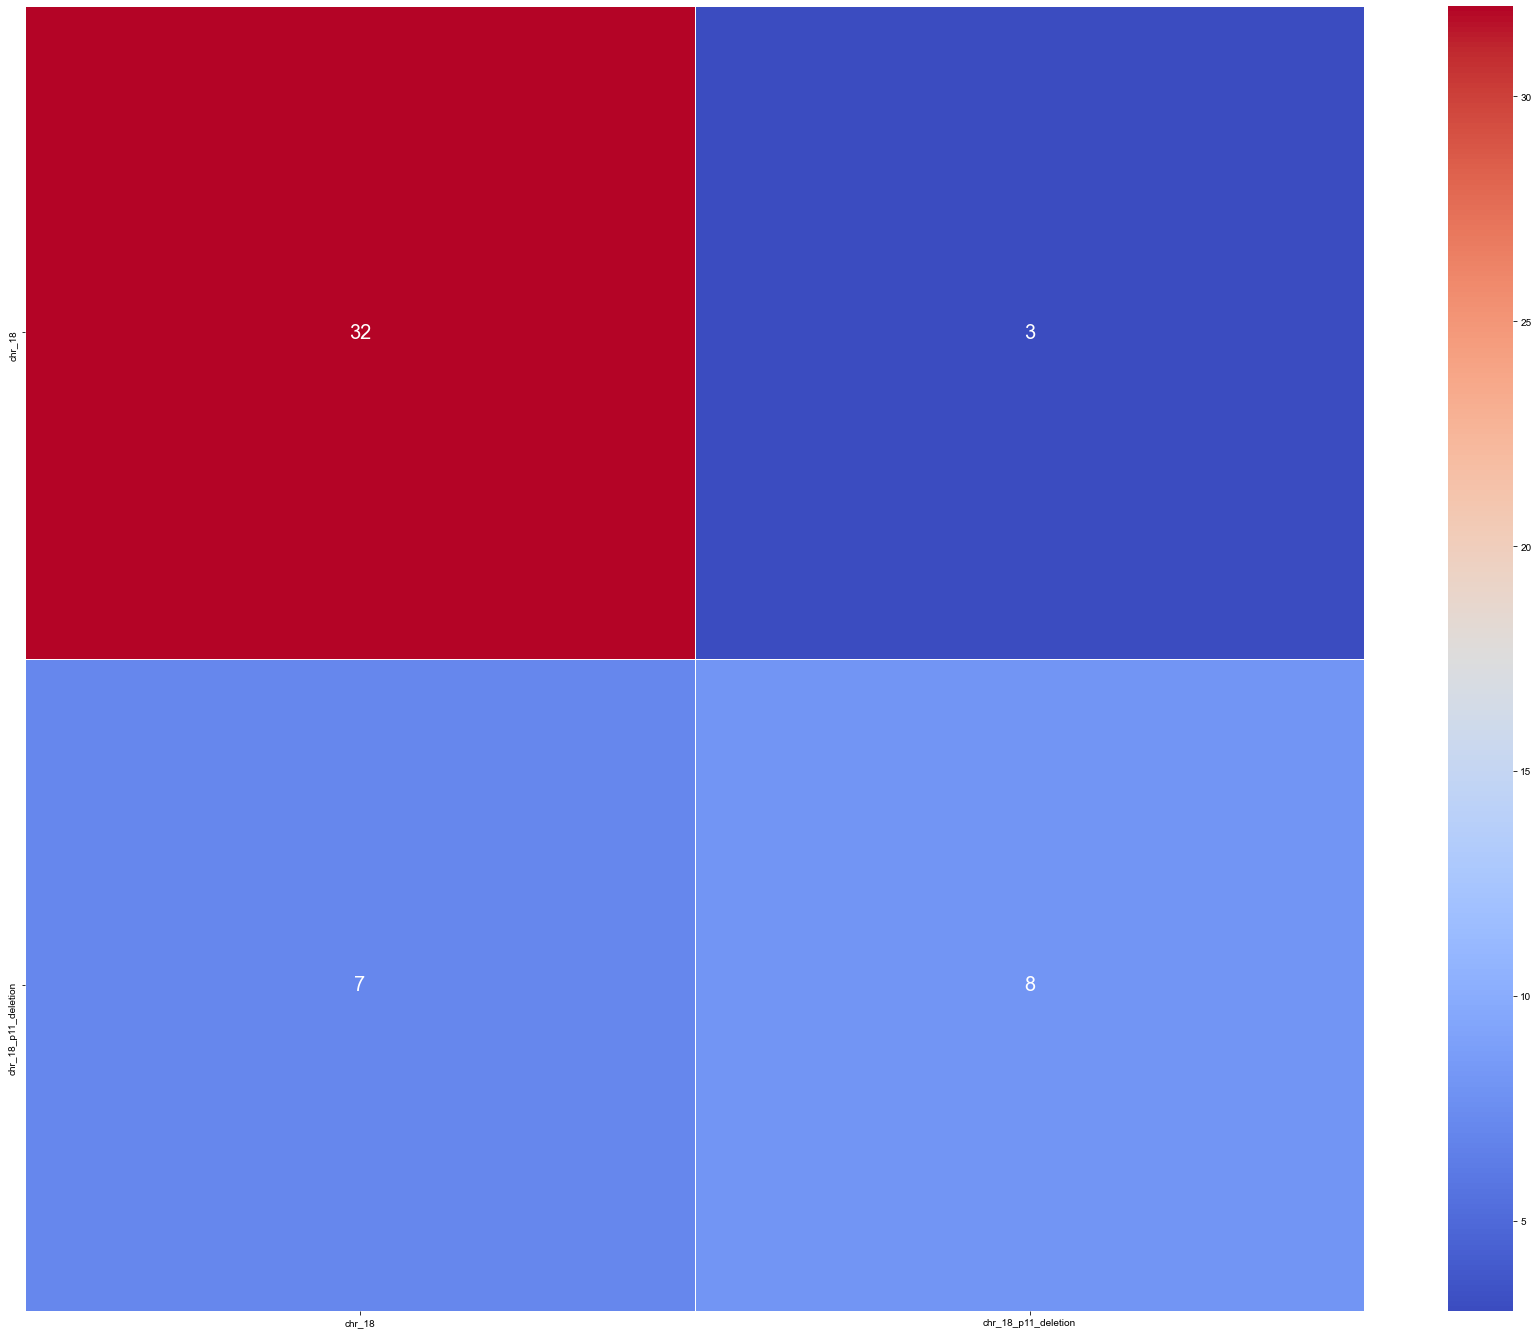

In [52]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [53]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_18_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [54]:
y_predict

array([[9.9999976e-01, 5.8100729e-09],
       [8.4701067e-01, 3.6175118e-03],
       [9.9998021e-01, 9.4645043e-07],
       [9.9997067e-01, 4.1664780e-06],
       [9.9990153e-01, 6.5113923e-06],
       [1.0000000e+00, 1.5133962e-15],
       [1.0000000e+00, 8.6858570e-10],
       [9.9999928e-01, 1.9782687e-08],
       [1.0000000e+00, 8.6063903e-13],
       [9.9999976e-01, 3.1694378e-09],
       [1.0000000e+00, 2.3751097e-30],
       [6.4019032e-02, 9.0500820e-01],
       [9.9999928e-01, 2.4369768e-08],
       [1.3424593e-01, 1.4652723e-01],
       [9.9935263e-01, 4.3337732e-06],
       [9.9999917e-01, 1.1805259e-08],
       [9.9999976e-01, 1.5542751e-08],
       [3.7905964e-01, 1.6790481e-01],
       [9.9983490e-01, 1.6580067e-05],
       [1.0000000e+00, 2.1804768e-10],
       [1.0000000e+00, 3.7822143e-10],
       [1.0000000e+00, 8.8663149e-10],
       [9.9999857e-01, 7.4875416e-08],
       [1.0000000e+00, 3.1693936e-10],
       [9.9431157e-01, 5.4937886e-04],
       [1.0000000e+00, 2.

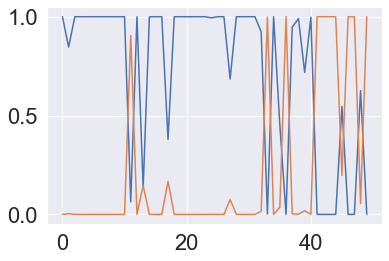

In [55]:
plt.plot(y_predict)

In [56]:
y_predict_1D = y_predict[:,0]

In [57]:
y_predict_1D_processed = 1- y_predict_1D

In [58]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [59]:
auc_rf

0.9257142857142857

In [60]:
x = y = np.arange(0,1.1,0.1)

In [61]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

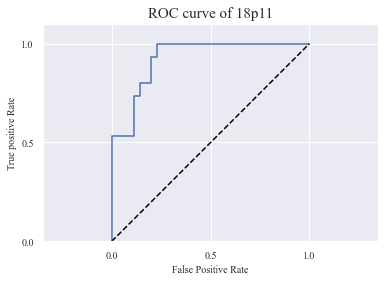

In [62]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of 18p11', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [63]:
auc_value = auc(fpr, tpr)

In [64]:
print('AUC is ', auc_value)

AUC is  0.9257142857142857


# Results

In [65]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.800


In [66]:
print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.82      0.91      0.86        35
chr_18_p11_deletion       0.73      0.53      0.62        15

          micro avg       0.80      0.80      0.80        50
          macro avg       0.77      0.72      0.74        50
       weighted avg       0.79      0.80      0.79        50



In [67]:
type(performanceReport)

str

In [68]:
confusion

,chr_18,chr_18_p11_deletion
chr_18,32,3
chr_18_p11_deletion,7,8


In [69]:
print('AUC is ', auc_value)

AUC is  0.9257142857142857


## Export to a text file

In [70]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()